In [1]:
from fleiadex.interface import VariationalAutoencoder

2024-08-18 18:54:26.330976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 18:54:26.339882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 18:54:26.342606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 18:54:26.800270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
vae = VariationalAutoencoder('/home/arezy/Desktop/fleiadex/outputs/2024-08-17/18-13-15/results/vae_ckpt')

loading vae from /home/arezy/Desktop/fleiadex/outputs/2024-08-17/18-13-15/results/vae_ckpt


2024-08-18 18:54:27.491211: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-08-18 18:54:29.243737: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-18 18:54:31.841038: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if

loading succeeded.


In [10]:
import jax.numpy as jnp

data = jnp.load('/home/arezy/Desktop/fleiadex/src/fleiadex/exp_data/satel_array_202312bandopt00_clear.npy')

Array([[[[260.52075, 257.75586, 256.6131 , ..., 244.5329 , 244.5329 ,
          245.74776],
         [260.18054, 259.45734, 259.4191 , ..., 252.90823, 252.90823,
          254.76372],
         [258.41776, 261.23413, 264.0606 , ..., 257.63843, 257.63843,
          258.53397],
         ...,
         [206.02536, 206.02536, 206.60204, ..., 200.56235, 200.56235,
          200.56235],
         [204.44902, 204.44902, 205.44095, ..., 200.56235, 200.782  ,
          200.782  ],
         [203.63858, 203.63858, 204.24785, ..., 201.64903, 202.2876 ,
          202.2876 ]],

        [[247.4946 , 245.09618, 243.55511, ..., 233.93091, 233.93091,
          235.74138],
         [246.96664, 245.54478, 245.45523, ..., 239.9219 , 239.9219 ,
          242.82121],
         [246.25829, 247.05482, 249.49294, ..., 244.10184, 244.10184,
          246.25829],
         ...,
         [205.49893, 205.49893, 206.54211, ..., 201.13783, 200.81374,
          200.81374],
         [204.28471, 204.28471, 205.94815, ..., 20

In [13]:
from einops import rearrange

data = rearrange(data, 'b c w h -> b w h c')

In [19]:
from tqdm.notebook import tqdm

latent_data = jnp.array([])
pbar = tqdm(total=len(data))
for image in data:
    image = jnp.expand_dims(image, axis=0)
    latent = vae.encode(image)
    latent_data = jnp.append(latent_data, latent)
    pbar.update(1)

  0%|          | 0/4382 [00:00<?, ?it/s]

  2%|▏         | 94/4382 [00:09<07:17,  9.80it/s]


In [20]:
jnp.save('./latent_data.npy', latent_data)

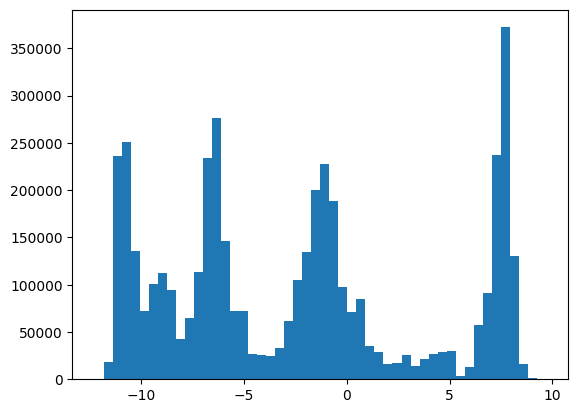

In [25]:
import matplotlib.pyplot as plt

plt.hist(latent_data, bins=50);